# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:24:59.112784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:25:02.156453
2025-04-14 20:25:02.156453


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:24:56"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

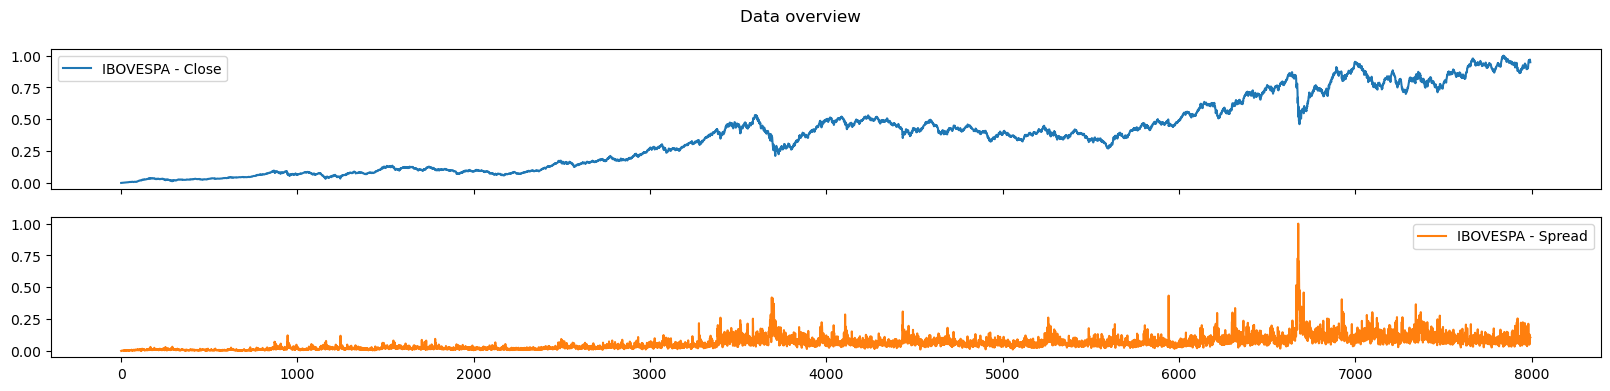

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

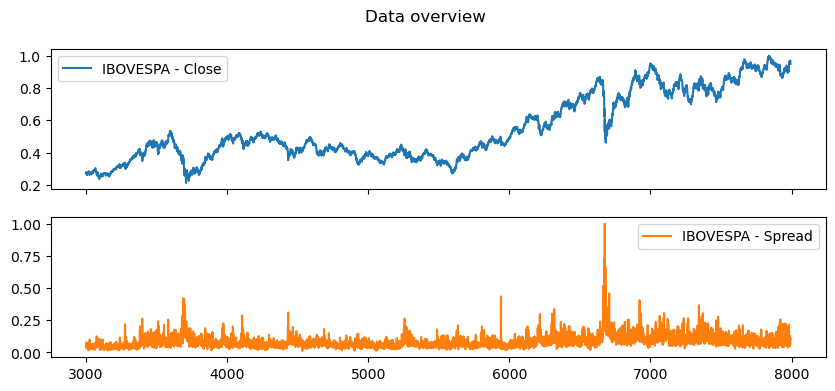

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

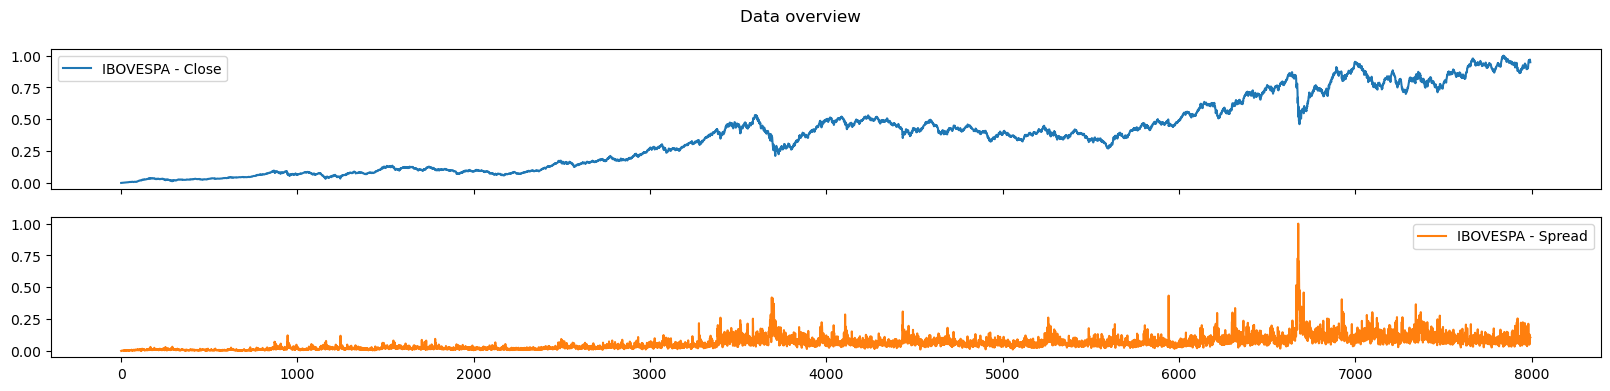

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

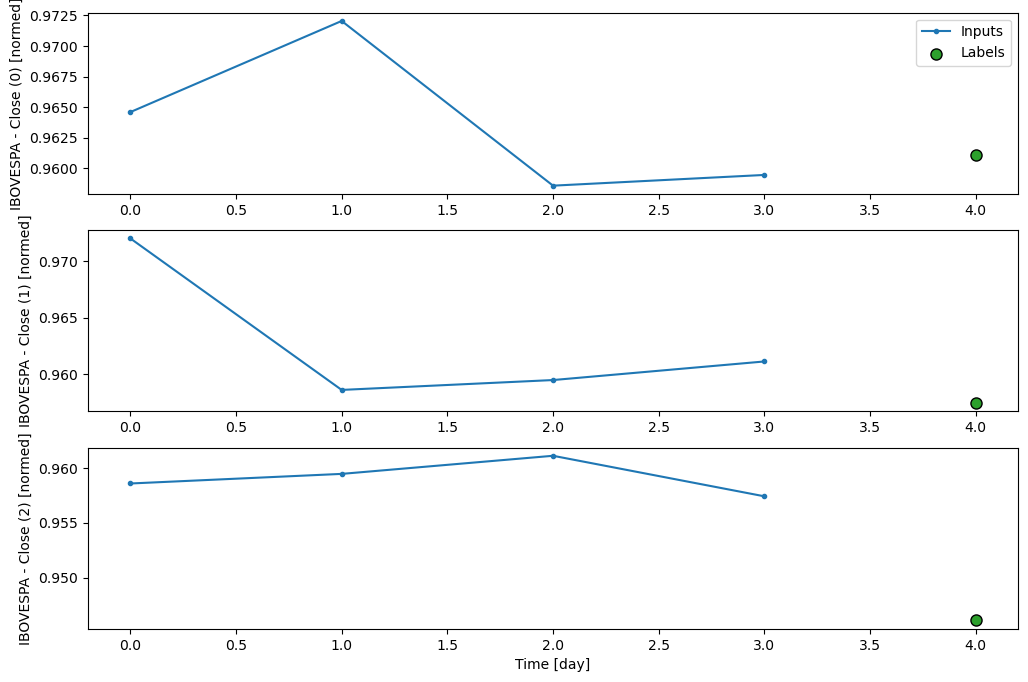

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15:16 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.0882 - mean_squared_error: 3.1294e-05 - root_mean_squared_error: 0.0054   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.3505 - mean_squared_error: 3.4120e-05 - root_mean_squared_error: 0.0057

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.9941 - mean_squared_error: 3.5550e-05 - root_mean_squared_error: 0.0059

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.7227 - mean_squared_error: 5.6465e-05 - root_mean_squared_error: 0.0071

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 29.0884 - mean_squared_error: 9.0480e-05 - root_mean_squared_error: 0.0087

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.0688 - mean_squared_error: 1.2438e-04 - root_mean_squared_error: 0.0101

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.0363 - mean_squared_error: 1.4905e-04 - root_mean_squared_error: 0.0111

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.2677 - mean_squared_error: 1.7178e-04 - root_mean_squared_error: 0.0120

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.8140 - mean_squared_error: 2.0962e-04 - root_mean_squared_error: 0.0132

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.2619 - mean_squared_error: 2.4264e-04 - root_mean_squared_error: 0.0142

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.8271 - mean_squared_error: 2.8877e-04 - root_mean_squared_error: 0.0153

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.4139 - mean_squared_error: 3.7505e-04 - root_mean_squared_error: 0.0171

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 24.1057 - mean_squared_error: 4.7325e-04 - root_mean_squared_error: 0.0189

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.8493 - mean_squared_error: 6.5804e-04 - root_mean_squared_error: 0.0215

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 23.6351 - mean_squared_error: 8.2267e-04 - root_mean_squared_error: 0.0238

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 23.3818 - mean_squared_error: 9.8120e-04 - root_mean_squared_error: 0.0259

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 23.1318 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278    

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 22.9048 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.6650 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 22.4686 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 22.2597 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 22.1061 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.9273 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 21.7561 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 21.5812 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0385

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 21.5233 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389 - val_loss: 0.1847 - val_mean_absolute_error: 0.1847 - val_mean_absolute_percentage_error: 19.8371 - val_mean_squared_error: 0.0356 - val_root_mean_squared_error: 0.1887 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7156 - mean_absolute_error: 0.7156 - mean_absolute_percentage_error: 33581.1797 - mean_squared_error: 0.5121 - root_mean_squared_error: 0.7156

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6826 - mean_absolute_error: 0.6826 - mean_absolute_percentage_error: 13785.7695 - mean_squared_error: 0.4679 - root_mean_squared_error: 0.6836 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6040 - mean_absolute_error: 0.6040 - mean_absolute_percentage_error: 9605.0488 - mean_squared_error: 0.3937 - root_mean_squared_error: 0.6232 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5206 - mean_absolute_error: 0.5206 - mean_absolute_percentage_error: 7520.2617 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5643

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4567 - mean_absolute_error: 0.4567 - mean_absolute_percentage_error: 6242.9111 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5183

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 5372.1992 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4820

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 4735.1201 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4525

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 4198.7539 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4256

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 3819.8152 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4052

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 3478.8772 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3858

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 3224.8972 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3706

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 3008.8745 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3572

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 2803.4875 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3439

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 2626.9939 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3323

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 2487.9822 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3230

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 2351.4038 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3135

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 2230.4290 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3050

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 2132.6987 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2979

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 2034.6038 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2906

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 1954.4417 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2845

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1896.7522 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2800

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 1865.4467 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2776

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1835.2661 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2752

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1771.1489 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2702

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1711.7806 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2655

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 1662.5774 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2616

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 1622.0078 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2584

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 1572.9341 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2544

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 1557.3046 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2531 - val_loss: 0.1434 - val_mean_absolute_error: 0.1434 - val_mean_absolute_percentage_error: 15.3634 - val_mean_squared_error: 0.0220 - val_root_mean_squared_error: 0.1484 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5737 - mean_absolute_error: 0.5737 - mean_absolute_percentage_error: 26898.1289 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5737

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 10943.2061 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5300 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 7330.6924 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4733 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 5784.0957 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4295

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 4824.8467 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3954

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 4165.1011 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3683

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 3679.3237 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3463

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 3304.8528 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3279

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 3006.5806 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3123

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 2762.7024 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2988

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 2538.3892 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2857

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 2350.9912 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2743

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 2206.6646 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2652

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 2067.6270 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2561

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 1958.0381 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2487

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 1850.3635 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2412

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 1764.0205 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2351

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1686.1073 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2294

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 1615.4122 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2241

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 1550.9469 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2192

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1485.6449 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2141

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 1426.1190 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2094

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1376.8535 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2054

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1331.1984 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2018

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1288.7612 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.1984

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1249.1941 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.1952

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1224.2732 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.1932 - val_loss: 0.0997 - val_mean_absolute_error: 0.0997 - val_mean_absolute_percentage_error: 10.6386 - val_mean_squared_error: 0.0112 - val_root_mean_squared_error: 0.1060 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 15609.9492 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3324

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 6286.8560 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2948  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 4279.6665 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2536

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 3329.1770 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2262

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 2753.7595 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2062

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 2364.0613 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1909

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 2053.4136 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1775

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 1842.3885 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1677

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 1674.6222 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1594

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1565.8845 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1538

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 1447.1765 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1475

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1346.8495 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1419

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 1260.8524 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1371

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1186.2156 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1328

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 1120.7393 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1289

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 1056.7499 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1250

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1005.6848 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1219

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 954.9674 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1187 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 913.9100 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1160

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 872.6249 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1133

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 838.8345 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1110

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 804.5184 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1087

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 776.1686 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1067

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 752.7504 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1051

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 733.5048 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1037

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 710.3013 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1022

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 688.6571 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1008

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 679.5006 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1002 - val_loss: 0.0517 - val_mean_absolute_error: 0.0517 - val_mean_absolute_percentage_error: 5.4933 - val_mean_squared_error: 0.0033 - val_root_mean_squared_error: 0.0572 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4420 - mean_absolute_error: 0.4420 - mean_absolute_percentage_error: 20744.5820 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4420

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 8435.4951 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.4065  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 5815.5825 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3597

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 4547.4326 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3244

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 3777.8296 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2983

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 3254.4814 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2779

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 2835.2258 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2597

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 2549.0554 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2462

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 2320.8423 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2347

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 2134.0837 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2248

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 1978.0173 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2161

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 1845.3615 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2084

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1731.0592 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2015

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1631.4438 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.1954

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1543.7781 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1898

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 1465.9515 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1847

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1389.0493 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1796

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1327.0663 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1753

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1270.8981 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1713

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1214.3275 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1672

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1167.9528 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1638

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 1129.8835 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1609

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1098.7445 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1586

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1061.3781 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1557

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1026.7101 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1529

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 994.4506 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1504 

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 964.3462 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1480

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 951.6072 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1470 - val_loss: 0.0436 - val_mean_absolute_error: 0.0436 - val_mean_absolute_percentage_error: 4.6396 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0481 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 15324.9531 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.3262

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 6190.7744 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2931  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 4106.5459 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2522

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 3233.6599 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2274

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 2649.0439 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.2072

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 2262.0388 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1921

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 2008.3929 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1814

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1811.5834 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1725

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1653.5358 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1648

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1523.4917 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1582

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1414.3936 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1523

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 1321.3650 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1471

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1240.9818 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1424

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1163.5094 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1378

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1102.4291 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1341

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 1048.0549 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1307

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 999.2996 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1276 

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 955.3036 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1247

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 915.3816 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1219

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 878.9757 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1194

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 845.6289 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1171

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 814.9564 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1148

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 786.6409 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1127

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 760.4105 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1108

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 736.0385 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1089

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 710.9058 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1071

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 692.1274 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1057 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206 - val_mean_absolute_percentage_error: 2.2350 - val_mean_squared_error: 7.1470e-04 - val_root_mean_squared_error: 0.0267 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 15048.3281 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.3203

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 6097.2783 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2909  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 4060.1641 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2524

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 3201.3909 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2282

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 2672.0127 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2102

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 2309.0483 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1961

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 2095.2620 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1871

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1877.8967 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1773

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 1705.8187 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1690

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 1565.6642 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1618

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1449.0354 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1555

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1350.2207 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1499

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1256.6069 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1444

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1183.8538 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1400

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1113.2428 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1356

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1057.2133 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1321

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 1001.8472 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1284

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 957.2219 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1254 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 916.7795 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1226

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 876.0458 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1197

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 842.6608 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1173

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 811.9691 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1151

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 783.6437 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1130

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 757.4136 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1110

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 733.0531 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1091

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 710.3600 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1074

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 686.8981 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1056 - val_loss: 0.0527 - val_mean_absolute_error: 0.0527 - val_mean_absolute_percentage_error: 5.6315 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0561 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 15413.3525 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3281

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 6239.6494 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2974  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 4158.3652 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2586

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 3275.2227 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2330

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 2731.3779 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2141

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 2359.1460 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1994

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 2085.6516 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1877

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1875.1246 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1780

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1707.1875 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1698

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 1555.8929 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1619

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1443.1178 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1557

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1347.1095 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1502

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1264.2754 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1453

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1192.0312 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1409

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1128.4243 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1370

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1071.9044 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1335

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1021.3073 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1302

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 975.7256 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1272 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 934.4207 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1243

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 904.8679 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1223

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 866.0529 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1195

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 834.1244 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1172

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 804.6836 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1150

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 777.4419 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1130

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 749.4622 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1109

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 726.1115 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1091

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 701.9768 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1072

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 699.6638 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1070 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442 - val_mean_absolute_percentage_error: 4.7055 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0483 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 14019.9062 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2984

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 5668.7358 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2692  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 3893.9199 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2362

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 2972.6025 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2107

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 2480.4749 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1940

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 2143.0366 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1810

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 1894.9880 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1705

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 1703.9211 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1618

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1551.5385 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1543

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1426.7738 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1479

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 1322.5304 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1423

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1224.8949 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1367

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1149.7404 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1323

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1084.1667 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1283

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1020.3945 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1244

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 969.6918 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1211 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 924.2676 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1182

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 883.3105 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1154

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 846.1712 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 812.3215 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1105

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 778.0455 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1080

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 749.8086 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1059

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 723.7398 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1039

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 699.5919 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1021

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 677.1597 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1004

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 656.2584 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0988

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 636.7354 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0973 - val_loss: 0.0443 - val_mean_absolute_error: 0.0443 - val_mean_absolute_percentage_error: 4.7176 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0481 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 13038.9473 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2774

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 5261.8633 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2485  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 3606.5112 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2170

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 2880.4944 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1968

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 2422.2708 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1816

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 2038.9695 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1673

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1794.6632 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1574

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1608.4330 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1493

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1460.9906 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1424

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1340.8289 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1364

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1240.8436 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1311

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1147.5044 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1260

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1075.8606 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1219

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1013.4825 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1182

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 958.6384 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1148 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 904.9117 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1115

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 861.9440 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1087

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 823.2578 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1061

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 788.2225 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1037

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 756.3273 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1015

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 727.1541 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0995

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 700.3575 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0975

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 675.6487 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0957

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 652.7853 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0940

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 631.5663 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0924

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 611.8152 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0909

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 591.4072 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0893

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 587.5085 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0890 - val_loss: 0.0480 - val_mean_absolute_error: 0.0480 - val_mean_absolute_percentage_error: 5.1272 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0514 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 11388.9893 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2422

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 4574.4326 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2133  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 3120.6782 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1842

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 2430.2573 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1648

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 2014.0465 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1509

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1732.9767 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1404

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 1528.5735 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1323

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1372.1161 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1257

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 1247.8313 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1201

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1146.3168 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1151

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1061.6995 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1108

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 989.8969 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1070 

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 928.1093 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1036

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 868.7778 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1002

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 822.1561 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0975

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 776.4422 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0947

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 743.7261 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0927

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 710.3804 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 680.1786 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0886

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 649.7779 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0866

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 624.8689 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0849

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 601.9781 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0833

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 580.8630 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 561.3179 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0804

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 543.1711 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0791

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 526.2756 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0779

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 508.8130 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0766

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 507.1394 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0765 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371 - val_mean_absolute_percentage_error: 3.9407 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0413 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 12560.9160 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2672

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 5062.5728 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2384  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 3467.5471 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2078

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 2702.7390 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1862

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 2240.6667 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1705

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 1899.1902 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1574

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 1678.3638 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1481

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1508.5391 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1405

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1373.2118 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1340

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1251.3827 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1278

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1160.6312 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1229

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1083.4091 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1186

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1016.7928 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1148

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 958.6816 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1114 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 907.4907 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1083

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 857.2544 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1051

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 817.0152 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1025

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 776.9241 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0999

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 744.3792 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0976

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 714.7057 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0956

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 687.5282 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0936

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 662.5336 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0918

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 639.4608 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0901

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 618.0899 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0885

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 598.2377 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0870

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 579.7432 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0857

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 562.4700 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0844 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367 - val_mean_absolute_percentage_error: 3.9030 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0408 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 12109.0898 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2576

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 4877.7397 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2293  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 3339.5527 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1997

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 2666.5234 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1810

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1523 - mean_absolute_error: 0.1523 - mean_absolute_percentage_error: 2286.5122 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1686

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 1947.7955 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1563

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1706.0983 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1467

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1523.6191 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1389

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1380.3369 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1324

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1252.6348 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1261

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1158.3026 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1213

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 1078.5405 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1170

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1010.1046 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1131

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 944.5322 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1093 

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 893.1145 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1062

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 842.7917 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1032

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 802.5722 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1006

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 762.5792 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0980

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 730.1680 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0958

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 697.5426 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0936

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 670.8096 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0917

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 643.6330 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0898

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 618.7758 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0880

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 598.1439 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0864

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 578.9756 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0850

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 561.1166 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0837

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 544.4351 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0824 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_absolute_percentage_error: 3.5220 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0375 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 11579.1934 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2463

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 4660.8125 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2186  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 3087.9780 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1875

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 2429.9131 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1688

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 2026.0046 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1553

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1750.2263 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1449

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1547.6843 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1366

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 1376.7606 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1291

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1255.3594 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1234

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1155.6749 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1184

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 1072.1965 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1140

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1001.1100 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1101

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 946.1572 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1070 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 897.5112 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1041

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 849.0212 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1012

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 806.0015 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0986

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 767.5479 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0961

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 732.9456 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0939

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 701.6237 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0918

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 673.1217 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0898

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 647.0630 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0880

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 620.5972 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0861

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 598.7372 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0845

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 578.5090 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0830

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 561.7525 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 546.0345 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0806

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 531.2580 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0795

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 520.7448 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0787 - val_loss: 0.0356 - val_mean_absolute_error: 0.0356 - val_mean_absolute_percentage_error: 3.7807 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0396 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 12741.8184 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2711

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 5145.5693 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2436  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 3536.2678 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2140

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 2760.2051 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1923

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 2290.4382 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1765

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 1971.7235 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1642

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 1739.1918 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1544

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1561.0675 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1464

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1419.5337 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1396

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1315.7212 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1343

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1227.5758 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1296

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1151.6488 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1254

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1077.7992 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1212

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1013.7392 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1174

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 957.6129 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1140 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 907.9756 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1109

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 859.0911 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1077

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 819.8087 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1051

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 784.2962 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1027

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 752.0198 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1005

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 719.4246 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0982

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 692.6380 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0963

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 665.3384 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0942

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 642.7166 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0925

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 623.9846 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0911

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 606.4193 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0898

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 585.9373 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0882

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 576.2606 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0875 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 3.4428 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0365 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 12286.8203 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2614

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 4961.2944 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2348  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 3409.0034 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2061

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 2600.5042 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1834

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 2168.8870 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1687

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 1873.2556 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1572

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 1656.1759 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1481

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1489.1331 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1405

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 1397.2451 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1361

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1304.8414 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1315

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1225.1528 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1273

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1137.3519 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1226

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 1062.4930 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1184

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 997.8110 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1146 

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 941.3056 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1112

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 891.4713 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1081

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 842.5193 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1049

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 803.2750 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1024

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 767.8671 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1000

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 735.7418 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0978

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 706.4493 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0957

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 679.6182 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0938

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 654.9399 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0919

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 632.1572 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0902

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 611.0535 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0886

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 591.4471 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0871

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 573.1802 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0857

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 556.1191 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0844 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7786 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0393 - lr: 0.0067


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:28s:624ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:25:35.187704: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:24:56',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:28s:624ms',
 'TRAINING_EPOCHS': 16,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:25:35.383218: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 11362.7588 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2416

 16/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 3645.1252 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2279  

 31/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 2532.9792 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2214

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 2062.5020 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2157

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1843.7076 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2120

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1690.8225 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2087

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1538.7887 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2052

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1451.2778 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2030

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 1374.7733 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.2008

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 1280.3508 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1975

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1207.1415 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1945

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1136.1348 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1910

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 1073.9626 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1877

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 1013.8530 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1841

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 960.8527 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1806 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 921.9182 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1778

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 878.9193 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1747

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 843.5845 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1719

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 814.4221 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1695

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 776.0781 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1663

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 744.0979 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1634

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 714.9329 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1607

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 683.9753 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1577

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 677.7335 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1571


Loss: 0.08029470592737198 - MAE: 0.08029470592737198 - MSE: 0.01167082879692316 - MAPE: 186.58937072753906 - RMSE: 0.10803160816431046


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 1.9816 - mean_squared_error: 4.7158e-04 - root_mean_squared_error: 0.0217

8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 3.3221 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344     

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 3.4134 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354


Loss: 0.03551153466105461 - MAE: 0.03551153466105461 - MSE: 0.0015413210494443774 - MAPE: 3.778625965118408 - RMSE: 0.0392596609890461


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 4.3553 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 3.7199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373


Loss: 0.0334453284740448 - MAE: 0.0334453284740448 - MSE: 0.0013467288808897138 - MAPE: 3.5962631702423096 - RMSE: 0.03669780492782593


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

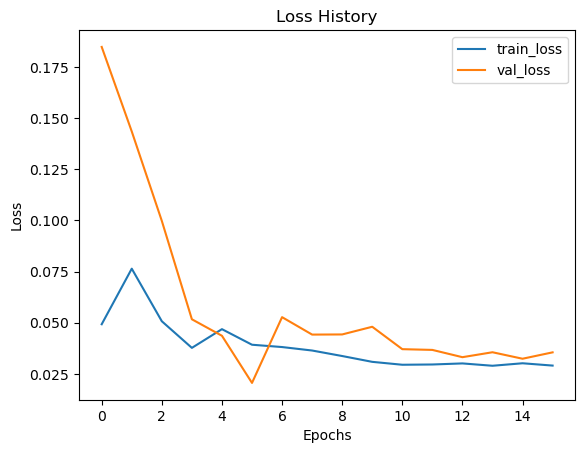

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

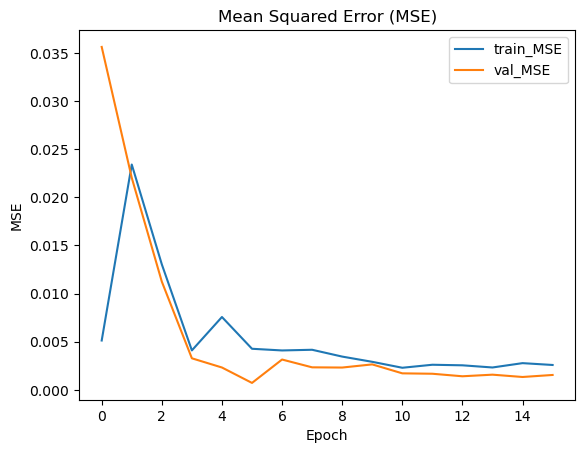

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

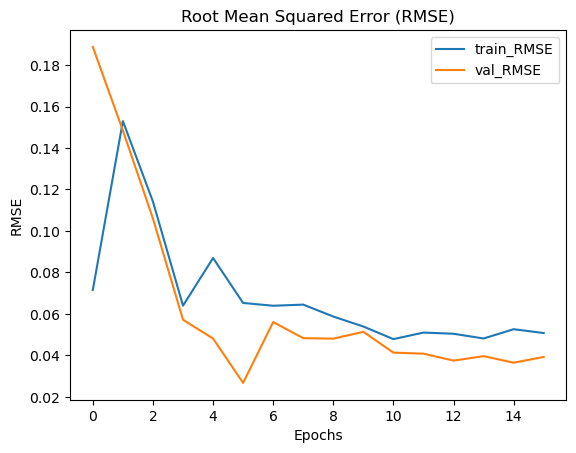

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

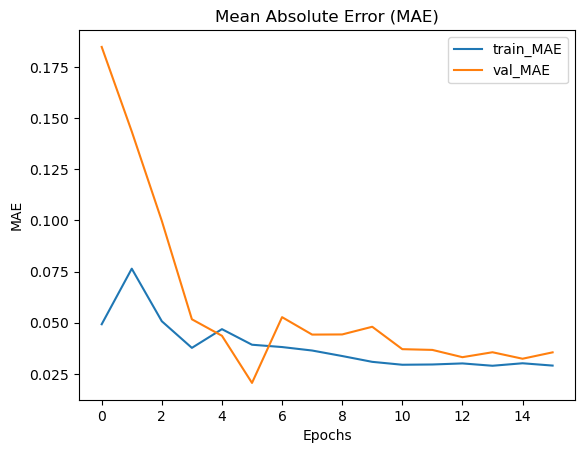

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

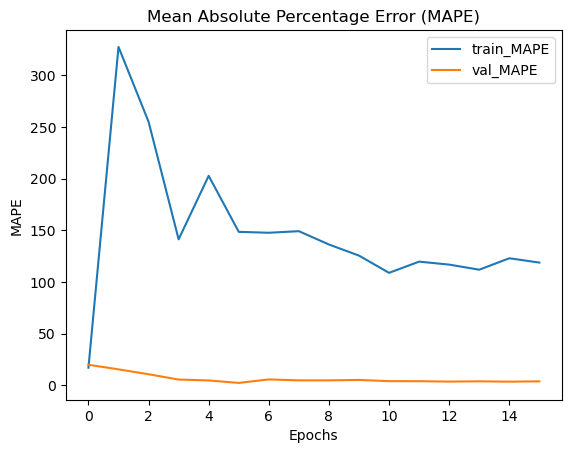

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:25:39.553196: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


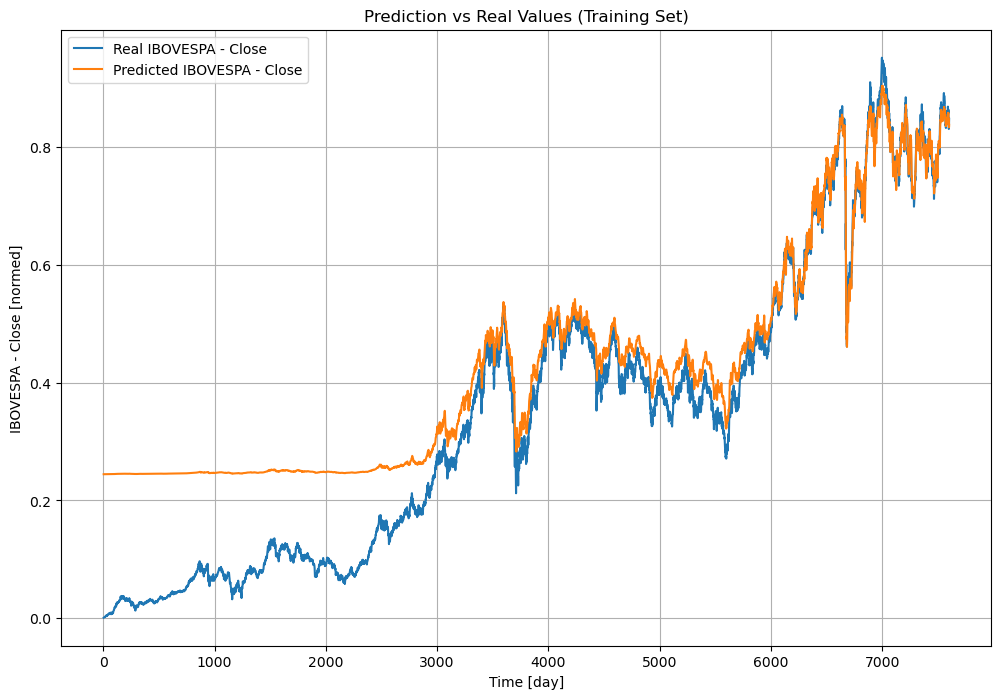

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


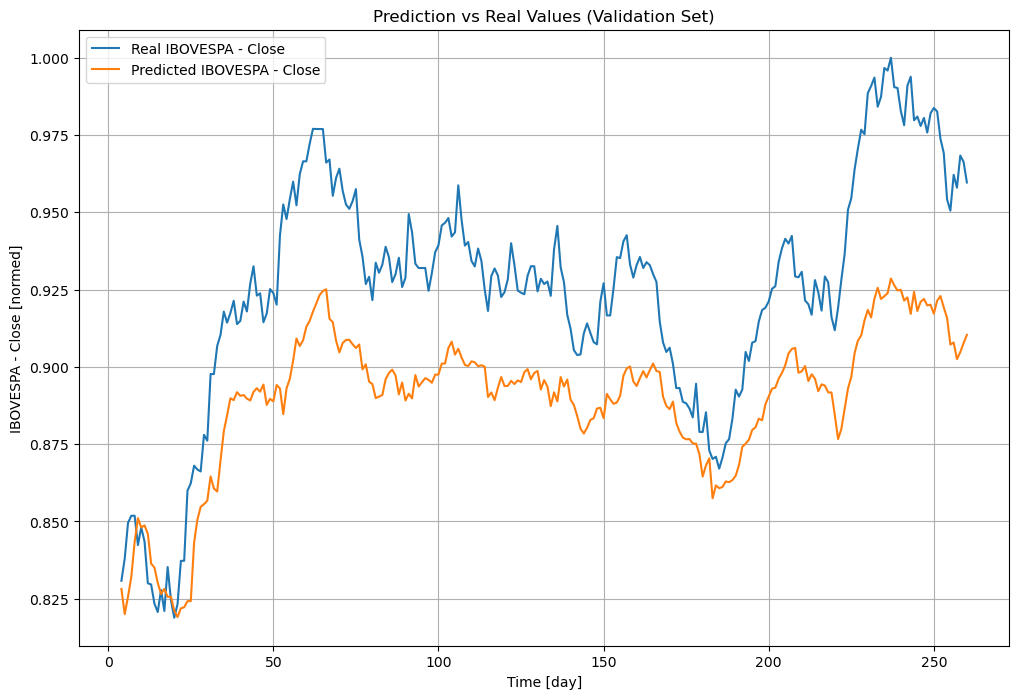

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


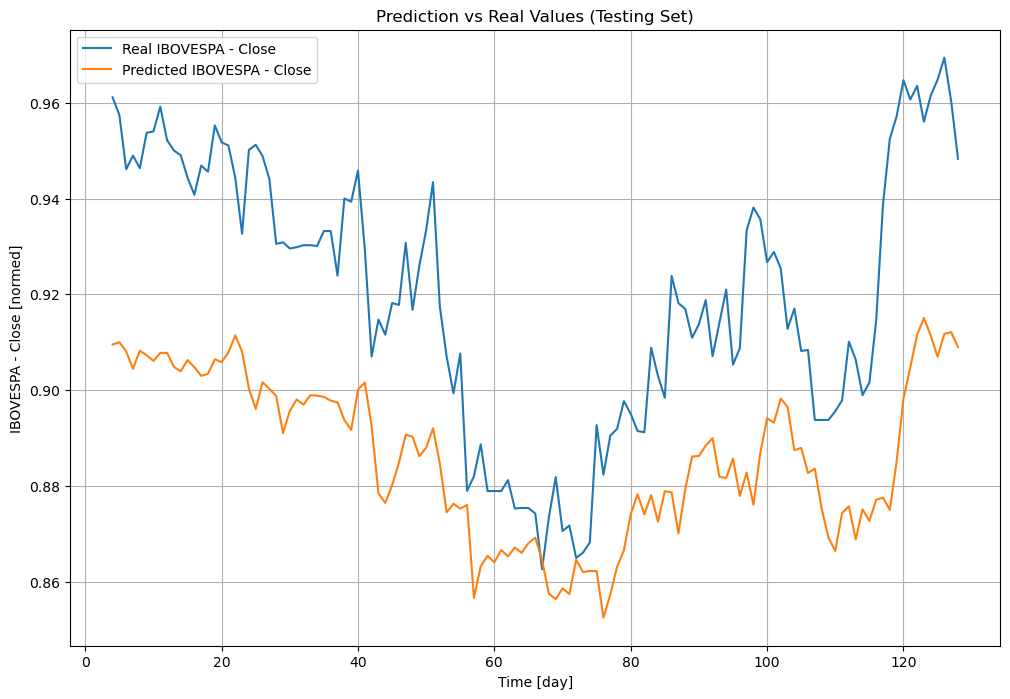

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

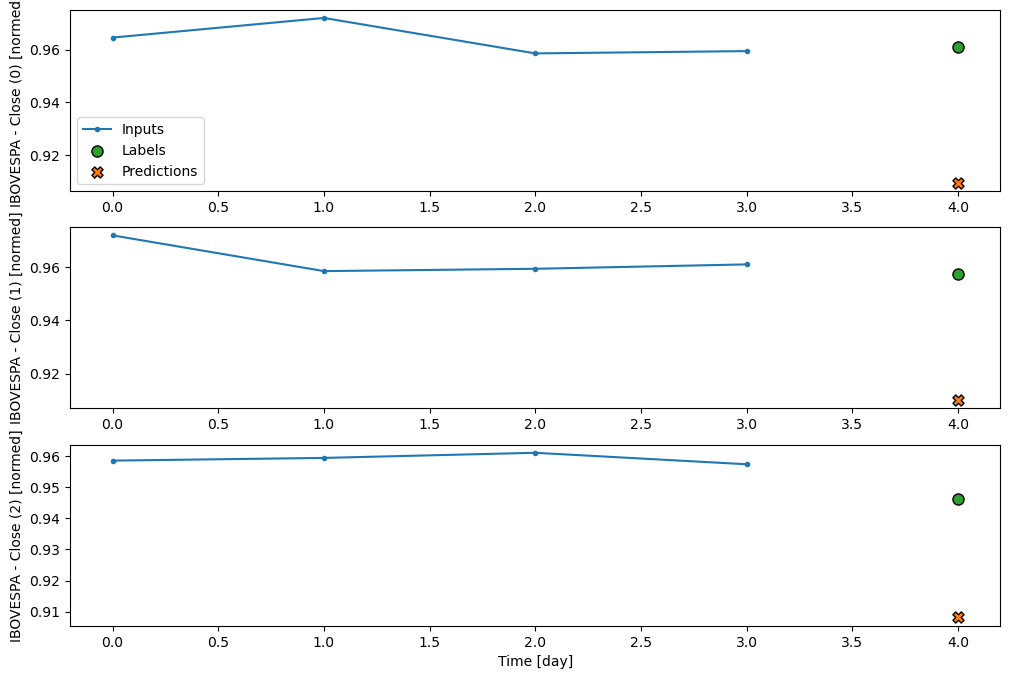

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:39s:828ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


array([[[0.9095346 , 0.9095346 , 0.9095346 , ..., 0.9095346 ,
         0.9095346 , 0.9095346 ]],

       [[0.91002595, 0.91002595, 0.91002595, ..., 0.91002595,
         0.91002595, 0.91002595]],

       [[0.9080945 , 0.9080945 , 0.9080945 , ..., 0.9080945 ,
         0.9080945 , 0.9080945 ]],

       ...,

       [[0.91175246, 0.91175246, 0.91175246, ..., 0.91175246,
         0.91175246, 0.91175246]],

       [[0.91211116, 0.91211116, 0.91211116, ..., 0.91211116,
         0.91211116, 0.91211116]],

       [[0.9090179 , 0.9090179 , 0.9090179 , ..., 0.9090179 ,
         0.9090179 , 0.9090179 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')